<a href="https://colab.research.google.com/github/Bgisemba/NHANES-Data-Demographic-Analysis/blob/branch/Demographic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
#loading and viewing the dataset
demo=pd.read_csv("Dataset/Demo/demographics_dataset - demographics_dataset.csv")
demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263,66,2,1,2.0,NaN,5,6,2.0,1,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3,156,4.66
1,109264,66,2,2,13.0,NaN,1,1,2.0,1,...,2.0,1.0,2.0,2.0,1.0,11689.747260,1.227116e+04,1,155,0.83
2,109265,66,2,1,2.0,NaN,3,3,2.0,1,...,2.0,NaN,NaN,NaN,NaN,16273.825940,1.665876e+04,1,157,3.06
3,109266,66,2,2,29.0,NaN,5,6,2.0,2,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2,168,5.00
4,109267,66,1,2,21.0,NaN,2,2,NaN,2,...,2.0,NaN,NaN,NaN,NaN,26379.991720,5.400000e-79,1,156,5.00


In [ ]:
#Selecting the relevant variables
demo_new=demo[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1','DMDBORN4','DMDYRUSZ','DMDEDUC2','DMDMARTZ','RIDEXPRG','INDFMPIR']]
demo_new.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDYRUSZ,DMDEDUC2,DMDMARTZ,RIDEXPRG,INDFMPIR
0,109263,1,2.0,5,1,NaN,NaN,NaN,NaN,4.66
1,109264,2,13.0,1,1,NaN,NaN,NaN,NaN,0.83
2,109265,1,2.0,3,1,NaN,NaN,NaN,NaN,3.06
3,109266,2,29.0,5,2,2.0,5.0,3.0,2.0,5.00
4,109267,2,21.0,2,2,3.0,4.0,3.0,3.0,5.00


In [ ]:
# dropping the SEQ column as it is just a sequence counter.

demo_new.drop(columns='SEQN',  inplace= True)

In [ ]:
#checking the no of records
demo_new.shape

(15560, 9)

In [ ]:
#checking the data types
demo_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  15560 non-null  int64  
 1   RIDAGEYR  15560 non-null  float64
 2   RIDRETH1  15560 non-null  int64  
 3   DMDBORN4  15560 non-null  int64  
 4   DMDYRUSZ  3028 non-null   float64
 5   DMDEDUC2  9232 non-null   float64
 6   DMDMARTZ  9232 non-null   float64
 7   RIDEXPRG  1874 non-null   float64
 8   INDFMPIR  13359 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.1 MB


## Data Cleaning

In [ ]:
#checking for missing values
demo_new.isnull().sum()

RIAGENDR        0
RIDAGEYR        0
RIDRETH1        0
DMDBORN4        0
DMDYRUSZ    12532
DMDEDUC2     6328
DMDMARTZ     6328
RIDEXPRG    13686
INDFMPIR     2201
dtype: int64

In [ ]:
#dropping respondents with age less than 18 to see if it afftects the missing values
demo_new=demo_new[demo_new['RIDAGEYR'] >= 18]
demo_new.isnull().sum()

RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDBORN4       0
DMDYRUSZ    6954
DMDEDUC2     461
DMDMARTZ     461
RIDEXPRG    7819
INDFMPIR    1481
dtype: int64

Dropping the respondenets below 18 years has an effetct

In [ ]:
#Calculate percentage of missing values
missing_percent = demo_new.isnull().mean() * 100

missing_percent = missing_percent[missing_percent > 0]

# Display missing percentages per column
print(missing_percent)

DMDYRUSZ    71.742495
DMDEDUC2     4.756009
DMDMARTZ     4.756009
RIDEXPRG    80.666460
INDFMPIR    15.279067
dtype: float64


Dropping columns with more than 50% missing data because they may lack sufficient information to be useful.
For columns with less than 20% missing data we will impute the missing values rather than dropping the column.

In [ ]:
# Filter columns where the percentage of missing values is greater than 50
columns_with_high_missing = missing_percent[missing_percent > 50]
columns_with_high_missing


DMDYRUSZ    71.742495
RIDEXPRG    80.666460
dtype: float64

In [ ]:
#Dropping nan columns where is higher than 50% nan
demo_new= demo_new.drop(columns_with_high_missing.index,axis=1)

In [ ]:
demo_new.isnull().sum()

RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDBORN4       0
DMDEDUC2     461
DMDMARTZ     461
INDFMPIR    1481
dtype: int64

In [ ]:
#Inputing the missing values of the categorical variable using the mode
demo_new['DMDEDUC2'].fillna(demo_new['DMDEDUC2'].mode()[0], inplace=True)
demo_new['DMDMARTZ'].fillna(demo_new['DMDMARTZ'].mode()[0], inplace=True)

In [ ]:
# for the continuous variable INDFMPIR we need to check the skewness and find out if there is any outliers to be able to choose the best way to input
Skewness = demo_new['INDFMPIR'].skew()
print("Skewness of INDFMPIR:", Skewness)


Skewness of INDFMPIR: 0.29444889250242473


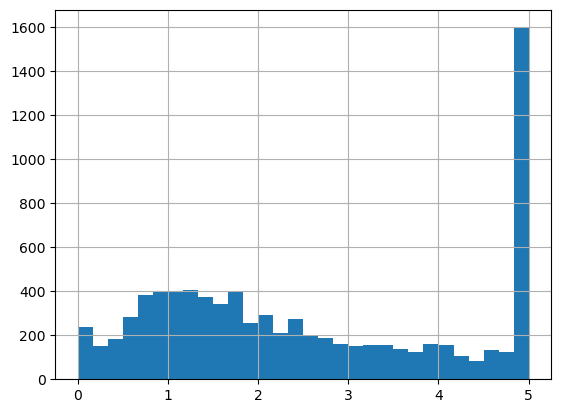

In [ ]:
demo_new['INDFMPIR'].hist(bins=30)
plt.show()

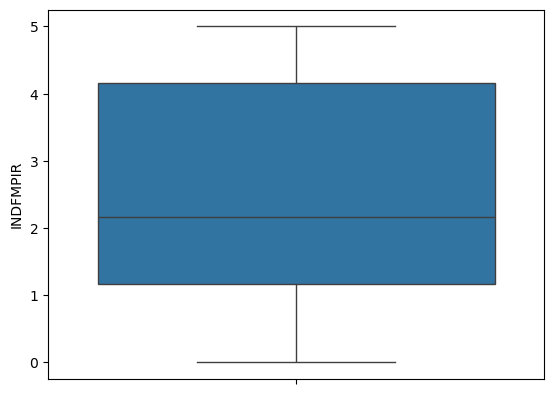

In [ ]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=demo_new['INDFMPIR'])
plt.show()

Since the skewness is minimal, the mean is representative of the dataset

In [ ]:
#inputing the missing values using the mean
demo_new['INDFMPIR'] = demo_new['INDFMPIR'].fillna(demo_new['INDFMPIR'].mean())

In [ ]:
demo_new.isnull().sum()

RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDBORN4    0
DMDEDUC2    0
DMDMARTZ    0
INDFMPIR    0
dtype: int64

## Faeture Engineering

In [ ]:
#Gender
demo_new['RIAGENDR'].value_counts()

RIAGENDR
2    4975
1    4718
Name: count, dtype: int64

In [ ]:
#encoding gender
demo_new['GENDER'] = demo_new['RIAGENDR'].map({1: 'Male', 2: 'Female'})

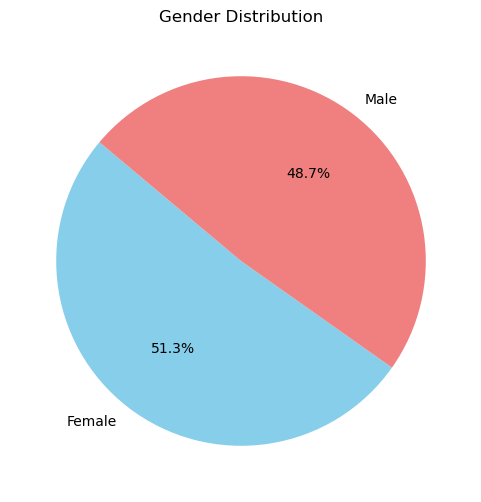

In [ ]:
# Count the occurrences of each gender
gender_counts = demo_new['GENDER'] .value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.show()

7721 Males
7839 Females

In [ ]:
#age
demo_new['RIDAGEYR'].value_counts()

RIDAGEYR
80.0    682
18.0    234
60.0    232
19.0    227
61.0    208
       ... 
75.0     94
77.0     81
76.0     76
79.0     69
78.0     69
Name: count, Length: 63, dtype: int64

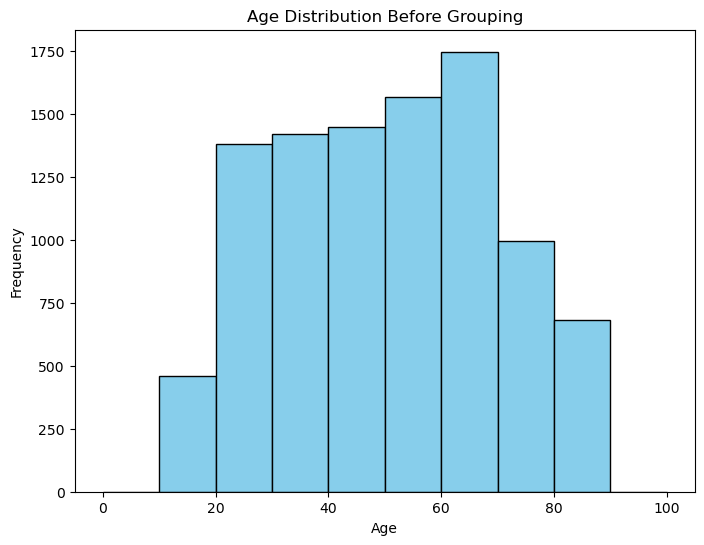

In [ ]:


# Plotting the distribution of ages before grouping
plt.figure(figsize=(8, 6))
plt.hist(demo_new['RIDAGEYR'], bins=range(0, 101, 10), edgecolor='black', color='skyblue')
plt.title("Age Distribution Before Grouping")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



Age Group Counts:
age_group
18-39    3026
40-59    3011
60-79    2740
80+       682
Name: count, dtype: int64


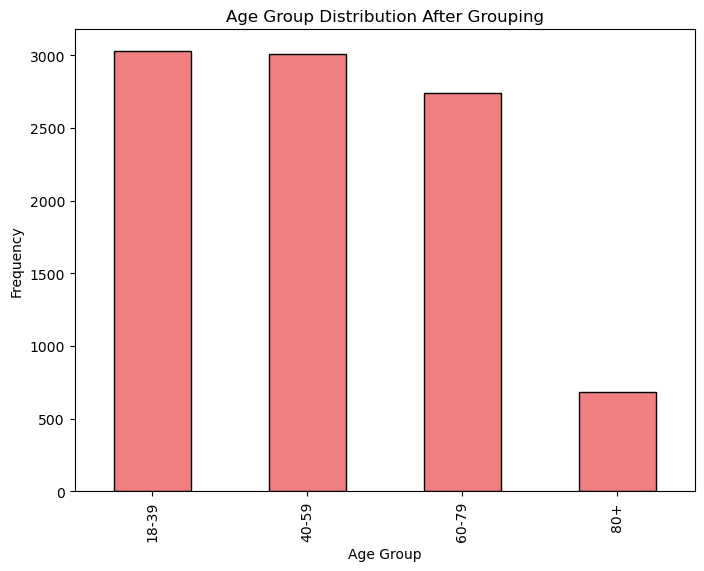

In [ ]:
# Define new age bins and labels for grouping
bins = [18, 39, 59, 79, float('inf')]  # Starting at 18
labels = ["18-39", "40-59", "60-79", "80+"]

# Grouping ages into defined categories
demo_new['age_group'] = pd.cut(demo_new['RIDAGEYR'], bins=bins, labels=labels, right=True)

# Display the grouped dataset
#print("Dataset with Age Groups:")
#print(df)

# Display count of each age group
age_group_counts = demo_new['age_group'].value_counts().sort_index()
print("\nAge Group Counts:")
print(age_group_counts)

# Plotting the grouped age distribution
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Age Group Distribution After Grouping")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

In [ ]:
demo_new.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDEDUC2,DMDMARTZ,INDFMPIR,GENDER,age_group
3,2,29.0,5,2,5.0,3.0,5.000000,Female,18-39
4,2,21.0,2,2,4.0,3.0,5.000000,Female,18-39
5,2,18.0,3,1,4.0,1.0,1.660000,Female,NaN
8,1,49.0,3,1,2.0,3.0,2.567789,Male,40-59
10,1,36.0,3,1,4.0,3.0,0.830000,Male,18-39


In [ ]:
demo_new['age_group'].value_counts()

age_group
18-39    3026
40-59    3011
60-79    2740
80+       682
Name: count, dtype: int64

In [ ]:
# Encode Race/Ethnicity

demo_new['RACE_ETHNICITY'] = demo_new['RIDRETH1'].map({
    1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black', 5: 'Other Race'
})

In [ ]:
demo_new.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDEDUC2,DMDMARTZ,INDFMPIR,GENDER,age_group,RACE_ETHNICITY
3,2,29.0,5,2,5.0,3.0,5.000000,Female,18-39,Other Race
4,2,21.0,2,2,4.0,3.0,5.000000,Female,18-39,Other Hispanic
5,2,18.0,3,1,4.0,1.0,1.660000,Female,NaN,Non-Hispanic White
8,1,49.0,3,1,2.0,3.0,2.567789,Male,40-59,Non-Hispanic White
10,1,36.0,3,1,4.0,3.0,0.830000,Male,18-39,Non-Hispanic White


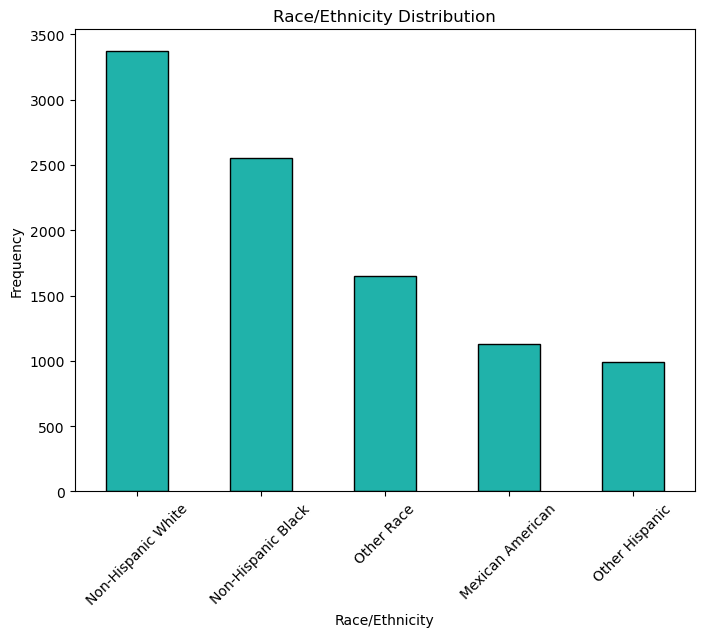

In [ ]:
# Count the occurrences of each race/ethnicity
race_ethnicity_counts = demo_new['RACE_ETHNICITY'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
race_ethnicity_counts.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("Race/Ethnicity Distribution")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
demo_new['RACE_ETHNICITY'].value_counts()

RACE_ETHNICITY
Non-Hispanic White    3370
Non-Hispanic Black    2555
Other Race            1646
Mexican American      1131
Other Hispanic         991
Name: count, dtype: int64

In [ ]:
# Encode Country of birth

demo_new['COUNTRY_BIRTH'] = demo_new['DMDBORN4'].map({
    1: 'Born in US', 2: 'Others', 77: 'Refused', 99: 'Don\'t Know'
})

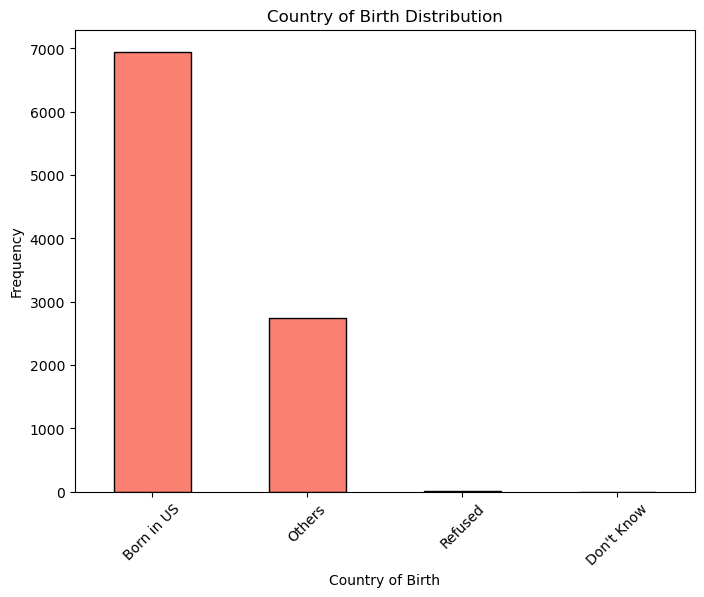

In [ ]:
# Count the occurrences of each country of birth category
country_birth_counts = demo_new['COUNTRY_BIRTH'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
country_birth_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Country of Birth Distribution")
plt.xlabel("Country of Birth")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
demo_new['COUNTRY_BIRTH'].value_counts()

COUNTRY_BIRTH
Born in US    6949
Others        2739
Refused          4
Don't Know       1
Name: count, dtype: int64

In [ ]:
#length of time in US
#demo_new['YEARS_IN_US'] = demo_new['DMDYRUSZ'].map({
   #1: 'Less than 5 years',2: '5 years or more, but less than 15 years',3: '15 years or more, but less than 30 years',
    #4: '30 years or more', 77: 'Refused', 99: 'Don\'t Know'
#})



In [ ]:
# Count the occurrences of each time category
#years_in_us_counts = demo_new['YEARS_IN_US'].value_counts()

# Plot bar chart
#plt.figure(figsize=(10, 6))
#years_in_us_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
#plt.title("Length of Time in the U.S. Distribution")
#plt.xlabel("Length of Time in U.S.")
#plt.ylabel("Frequency")
#plt.xticks(rotation=45)
#plt.show()

In [ ]:
#demo_new['YEARS_IN_US'].value_counts()

In [ ]:
# Encode Education Level
demo_new['EDUCATION'] = demo_new['DMDEDUC2'].map({
    1: 'Less than 9th grade', 2: '9-11th grade', 3: 'High school graduate',
    4: 'Some college or AA degree', 5: 'College graduate or above' ,77: 'Refused', 99: 'Don\'t Know'
})

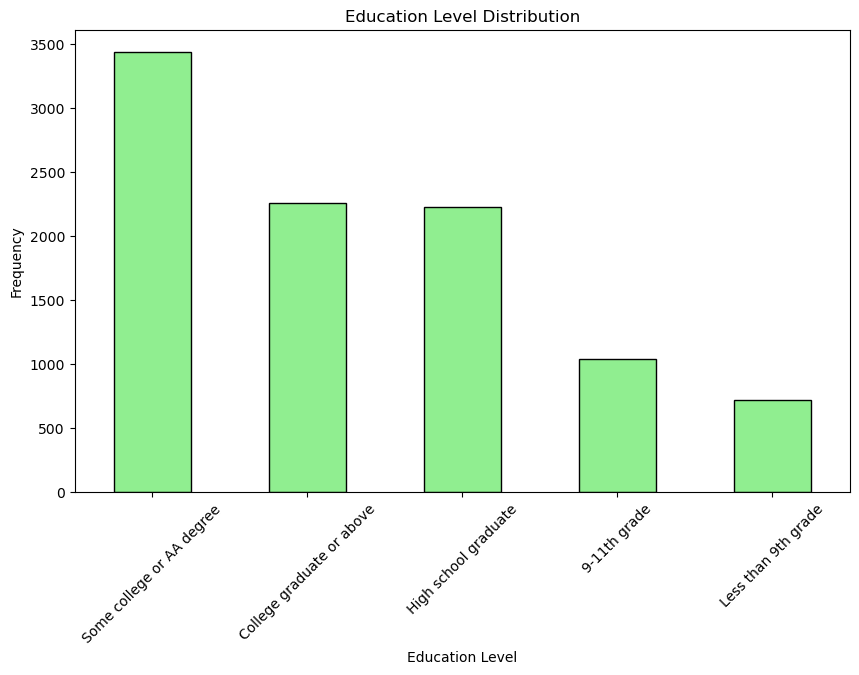

In [ ]:
# Count the occurrences of each education level
education_counts = demo_new['EDUCATION'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
demo_new['EDUCATION'].value_counts()

EDUCATION
Some college or AA degree    3436
College graduate or above    2257
High school graduate         2225
9-11th grade                 1041
Less than 9th grade           719
Name: count, dtype: int64

In [ ]:
demo_new['MARITAL_STATUS'] = demo_new['DMDMARTZ'].map({
    1: 'Married/Living with Partner', 2: 'Widowed/Divorced/Separated', 3: 'Never married',77: 'Refused', 99: 'Don\'t Know'
})

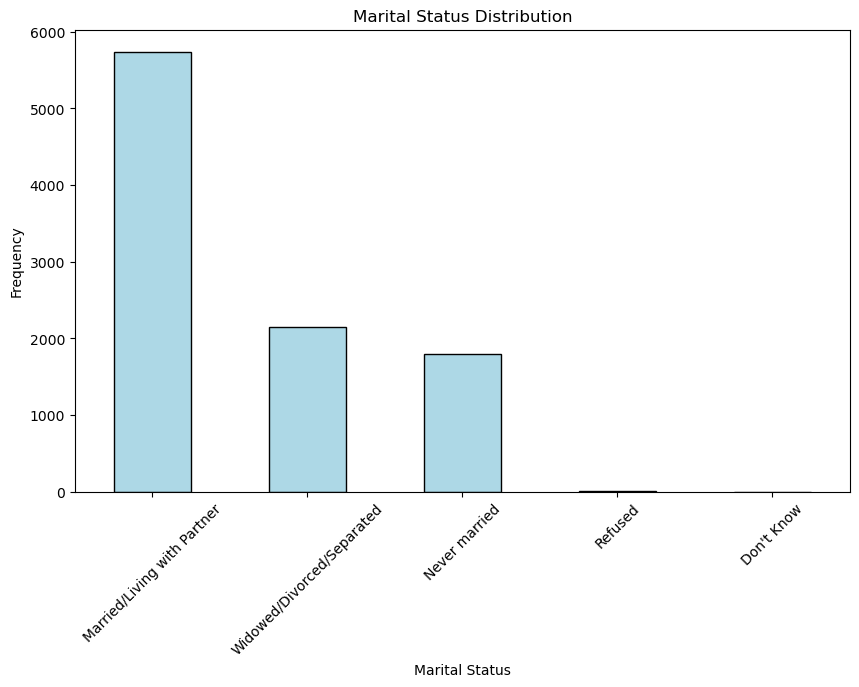

In [ ]:
# Count the occurrences of each marital status category
marital_status_counts = demo_new['MARITAL_STATUS'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
 demo_new['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
Married/Living with Partner    5740
Widowed/Divorced/Separated     2148
Never married                  1795
Refused                           8
Don't Know                        2
Name: count, dtype: int64

In [ ]:
#pregnancy status
#demo_new['PREGNANCY_STATUS'] = demo_new['RIDEXPRG'].map({
    #1: 'Pregnant', 2: 'Not Pregnant', 3: 'Cannot ascertain'
#})

In [ ]:
# Count the occurrences of each pregnancy status category
#pregnancy_status_counts = demo_new['PREGNANCY_STATUS'].value_counts()

# Plot bar chart
#plt.figure(figsize=(8, 6))
#pregnancy_status_counts.plot(kind='bar', color='lightpink', edgecolor='black')
#plt.title("Pregnancy Status Distribution")
#plt.xlabel("Pregnancy Status")
#plt.ylabel("Frequency")
#plt.xticks(rotation=0)
#plt.show()

In [ ]:
 #demo_new['PREGNANCY_STATUS'].value_counts()

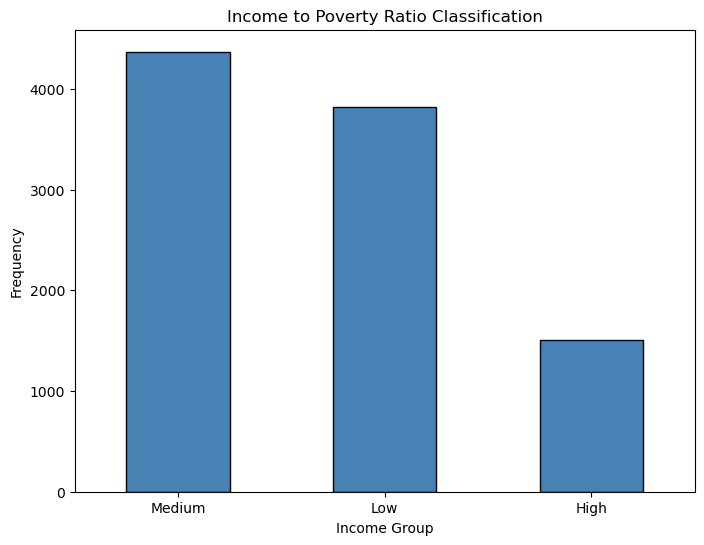

Income Group Counts:
INCOME_GROUP
Medium    4370
Low       3818
High      1505
Name: count, dtype: int64


In [ ]:
# Define thresholds for classification
def classify_income_to_poverty(ratio):
    if ratio < 2:  # Families below 2x the poverty line
        return 'Low'
    elif 2 <= ratio < 5:  # Families 2x to 5x the poverty line
        return 'Medium'
    else:  # Families 5x or above the poverty line
        return 'High'

# Apply classification
demo_new['INCOME_GROUP'] = demo_new['INDFMPIR'].apply(classify_income_to_poverty)

# Summary statistics
classification_counts = demo_new['INCOME_GROUP'].value_counts()


# Plot bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Income to Poverty Ratio Classification")
plt.xlabel("Income Group")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Display classification counts
print("Income Group Counts:")
print(classification_counts)



In [ ]:
demo_new.head()


,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDEDUC2,DMDMARTZ,INDFMPIR,GENDER,age_group,RACE_ETHNICITY,COUNTRY_BIRTH,EDUCATION,MARITAL_STATUS,INCOME_GROUP
3,2,29.0,5,2,5.0,3.0,5.000000,Female,18-39,Other Race,Others,College graduate or above,Never married,High
4,2,21.0,2,2,4.0,3.0,5.000000,Female,18-39,Other Hispanic,Others,Some college or AA degree,Never married,High
5,2,18.0,3,1,4.0,1.0,1.660000,Female,NaN,Non-Hispanic White,Born in US,Some college or AA degree,Married/Living with Partner,Low
8,1,49.0,3,1,2.0,3.0,2.567789,Male,40-59,Non-Hispanic White,Born in US,9-11th grade,Never married,Medium
10,1,36.0,3,1,4.0,3.0,0.830000,Male,18-39,Non-Hispanic White,Born in US,Some college or AA degree,Never married,Low


In [ ]:
demo_new.columns


Index(['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDBORN4', 'DMDEDUC2', 'DMDMARTZ',
       'INDFMPIR', 'GENDER', 'age_group', 'RACE_ETHNICITY', 'COUNTRY_BIRTH',
       'EDUCATION', 'MARITAL_STATUS', 'INCOME_GROUP'],
      dtype='object')

In [ ]:
columns=['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDBORN4','DMDEDUC2',
       'DMDMARTZ', 'INDFMPIR']
demo_clean=demo_new.drop(columns=columns,axis=1)

In [ ]:
demo_clean.head()

,GENDER,age_group,RACE_ETHNICITY,COUNTRY_BIRTH,EDUCATION,MARITAL_STATUS,INCOME_GROUP
3,Female,18-39,Other Race,Others,College graduate or above,Never married,High
4,Female,18-39,Other Hispanic,Others,Some college or AA degree,Never married,High
5,Female,NaN,Non-Hispanic White,Born in US,Some college or AA degree,Married/Living with Partner,Low
8,Male,40-59,Non-Hispanic White,Born in US,9-11th grade,Never married,Medium
10,Male,18-39,Non-Hispanic White,Born in US,Some college or AA degree,Never married,Low
